# Wine Quality Dataset Cleaning and Preparing

This Wine Quality dataset has been downloaded from the UCI repository https://archive.ics.uci.edu/ml/datasets/wine+quality. The details of this dataset are described in P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. (2009) Modeling wine preferences by data mining from physicochemical properties. *Decision Support Systems* 47(4):547-553.

In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [16]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/WineQuality/WineQualityRawDataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/WineQuality/WineQualityPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/WineQuality/WineQualityOneHotEncodedClasses.csv"

In [17]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=";")

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [19]:
dataset[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [20]:
dataset[-10:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


**First Step:** find out whether or not there are missing values. 

In [21]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'alcohol': 0,
 'chlorides': 0,
 'citric acid': 0,
 'density': 0,
 'fixed acidity': 0,
 'free sulfur dioxide': 0,
 'pH': 0,
 'quality': 0,
 'residual sugar': 0,
 'sulphates': 0,
 'total sulfur dioxide': 0,
 'volatile acidity': 0}

There are not missing values.

**Second Step**: Check outliers and scale data. There are several actions to consider regarding outliers:


1.   **Scale** each attribute based on its mean and standard deviation (normalization). This approach may produce values larger than 1 or lower than -1.
2.   **Remove** rows containing outliers; at least some of them. The disadvantage is that we do not have so many examples in the dataset.
3.   **Curate** data by modifying outliers.

In [22]:
normalized_ds = pd.DataFrame (scale (dataset.drop (columns="quality"), axis=0, copy=True),columns=dataset.drop (columns="quality").columns) 
normalized_ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


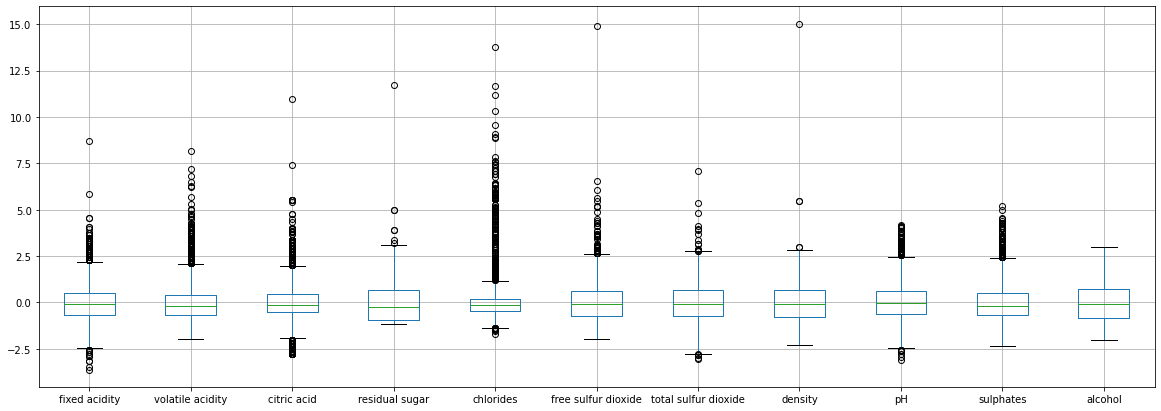

In [23]:
normalized_ds.boxplot(figsize=(20,7))

In [24]:
standardized_ds = pd.DataFrame (minmax_scale (dataset.drop (columns="quality"), axis=0, copy=True),columns=dataset.drop (columns="quality").columns) 
standardized_ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194


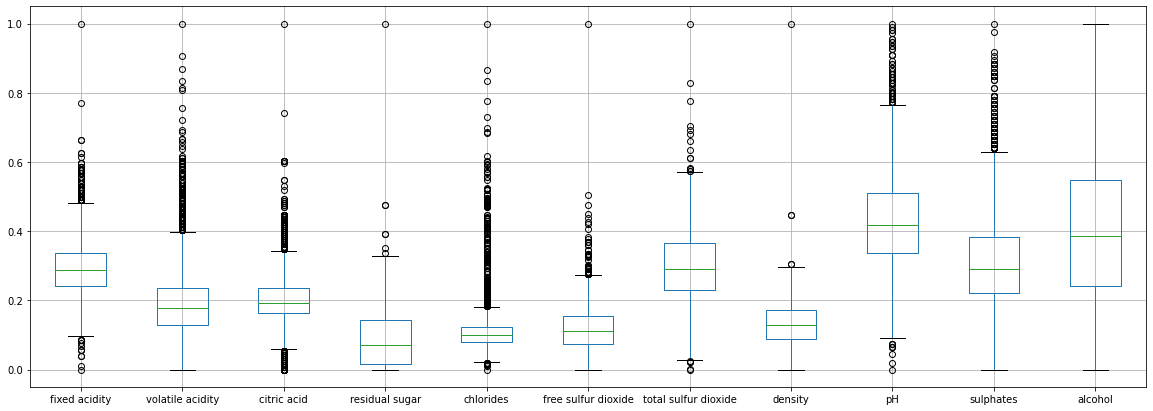

In [25]:
standardized_ds.boxplot(figsize=(20,7))

Note that both boxplot figures show the existence of outliers. Moreover, normalized data have a great amplitude of values, ranging from -2.5 to 2.5. Therefore, we proceed to curate the data.

**We study each attribute** and apply modifications to outliers to get them into the normal distribution.

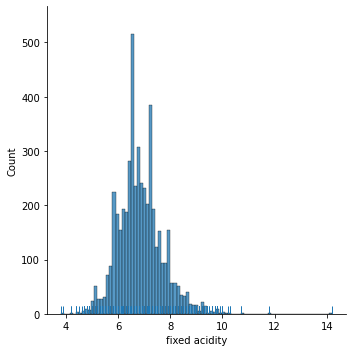

In [26]:
sns.displot(dataset["fixed acidity"],kde=False,rug=True)

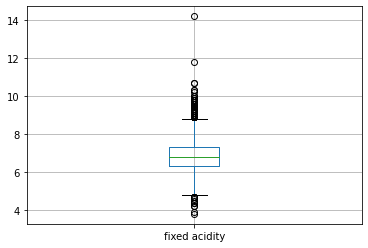

In [27]:
dataset.boxplot(column=["fixed acidity"])

In [28]:
print("minimum: ",np.amin(dataset["fixed acidity"].values), "Maximum: ", np.amax(dataset["fixed acidity"].values))

minimum:  3.8 Maximum:  14.2


In [29]:
dataset.loc[dataset['fixed acidity'] > 10,'fixed acidity']=10

In [30]:
dataset.loc[dataset['fixed acidity'] < 4.5,'fixed acidity']=4.5

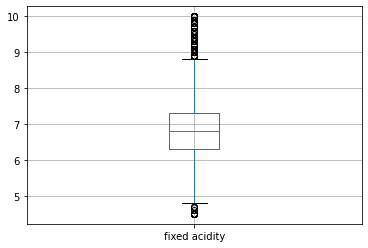

In [31]:
dataset.boxplot(column=["fixed acidity"])

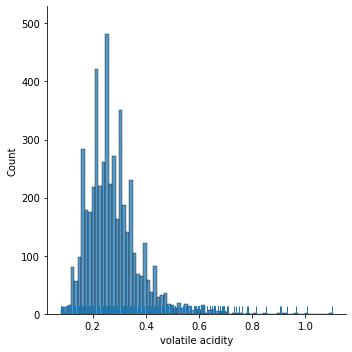

In [32]:
sns.displot(dataset["volatile acidity"],kde=False,rug=True)

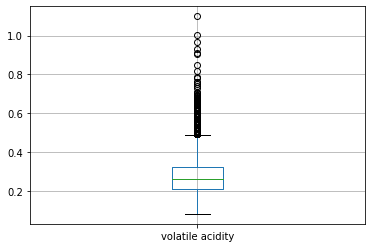

In [33]:
dataset.boxplot(column=["volatile acidity"])

In [34]:
print("minimum: ",np.amin(dataset["volatile acidity"].values), "Maximum: ", np.amax(dataset["volatile acidity"].values))

minimum:  0.08 Maximum:  1.1


In [35]:
dataset.loc[dataset['volatile acidity'] > 0.8,'volatile acidity']=0.8

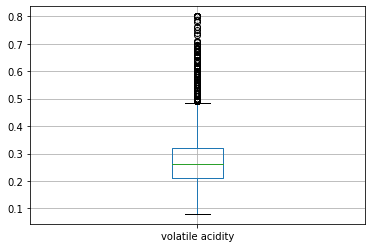

In [36]:
dataset.boxplot(column=["volatile acidity"])

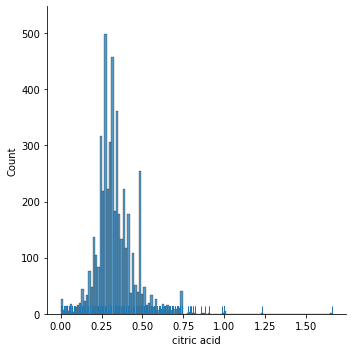

In [37]:
sns.displot(dataset["citric acid"],kde=False,rug=True)

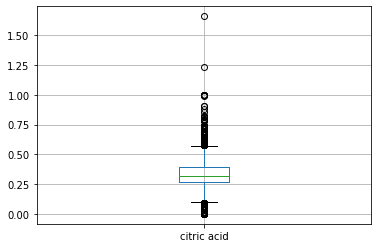

In [38]:
dataset.boxplot(column=["citric acid"])

In [39]:
print("minimum: ",np.amin(dataset["citric acid"].values), "Maximum: ", np.amax(dataset["citric acid"].values))

minimum:  0.0 Maximum:  1.66


In [40]:
dataset.loc[dataset['citric acid'] > 0.75,'citric acid']=0.75

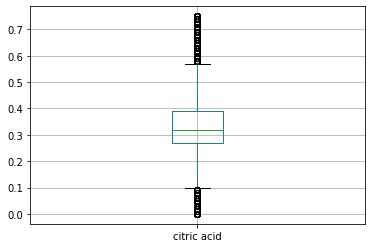

In [41]:
dataset.boxplot(column=["citric acid"])

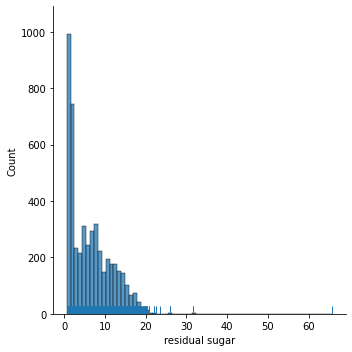

In [42]:
sns.displot(dataset["residual sugar"],kde=False,rug=True)

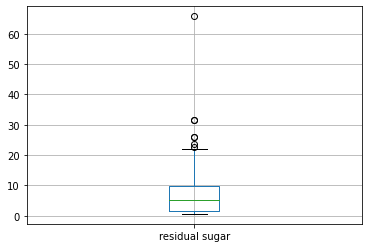

In [43]:
dataset.boxplot(column=["residual sugar"])

In [44]:
dataset.loc[dataset['residual sugar'] > 21,'residual sugar']=21

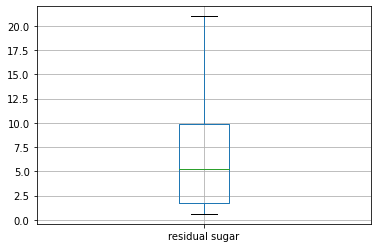

In [45]:
dataset.boxplot(column=["residual sugar"])

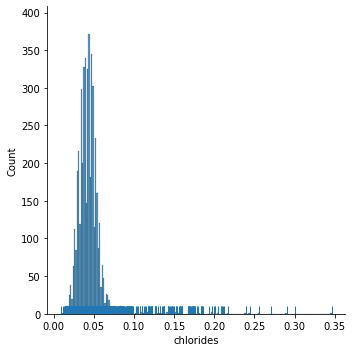

In [46]:
sns.displot(dataset["chlorides"],kde=False,rug=True)

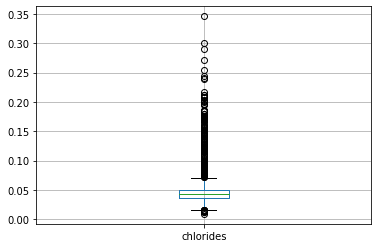

In [47]:
dataset.boxplot(column=["chlorides"])

In [48]:
print("minimum: ",np.amin(dataset["chlorides"].values), "Maximum: ", np.amax(dataset["chlorides"].values))

minimum:  0.009000000000000001 Maximum:  0.34600000000000003


In [49]:
dataset.loc[dataset['chlorides'] > 0.22,'chlorides']=0.22

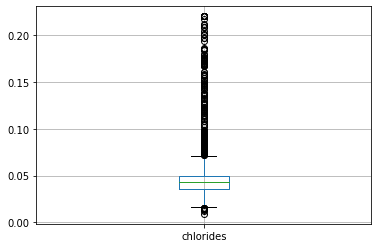

In [50]:
dataset.boxplot(column=["chlorides"])

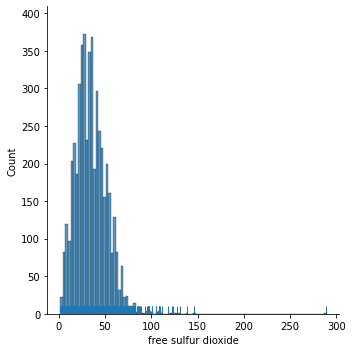

In [51]:
sns.displot(dataset["free sulfur dioxide"],kde=False,rug=True)

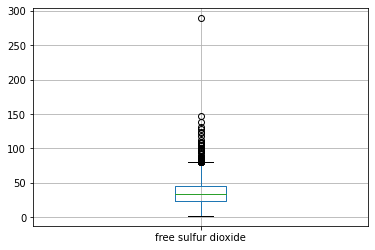

In [52]:
dataset.boxplot(column=["free sulfur dioxide"])

In [53]:
dataset.loc[dataset['free sulfur dioxide'] > 130,'free sulfur dioxide']=130

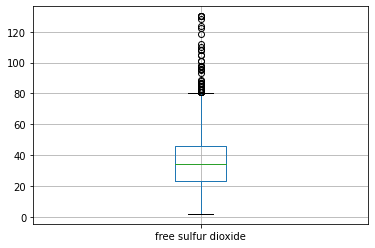

In [54]:
dataset.boxplot(column=["free sulfur dioxide"])

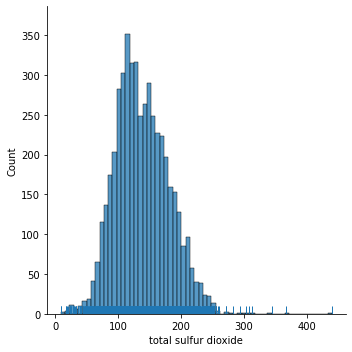

In [55]:
sns.displot(dataset["total sulfur dioxide"],kde=False,rug=True)

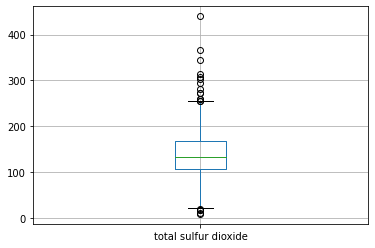

In [56]:
dataset.boxplot(column=["total sulfur dioxide"])

In [57]:
dataset.loc[dataset['total sulfur dioxide'] > 320,'total sulfur dioxide']=320

In [58]:
dataset.loc[dataset['total sulfur dioxide'] < 15,'total sulfur dioxide']=15

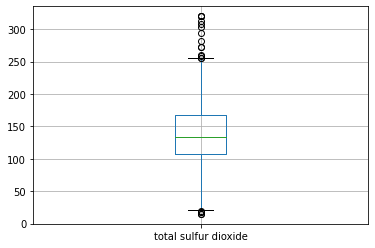

In [59]:
dataset.boxplot(column=["total sulfur dioxide"])

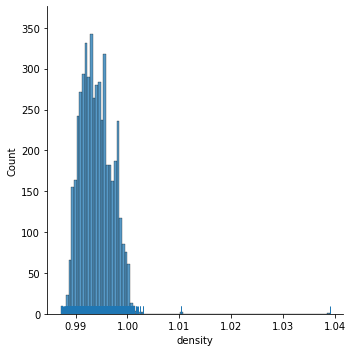

In [60]:
sns.displot(dataset["density"],kde=False,rug=True)

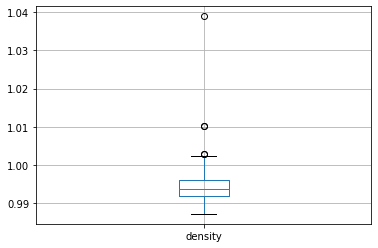

In [61]:
dataset.boxplot(column=["density"])

In [62]:
dataset.loc[dataset['density'] > 1.0025,'density']=1.0025

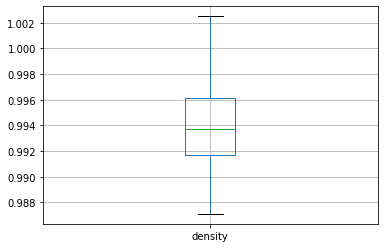

In [63]:
dataset.boxplot(column=["density"])

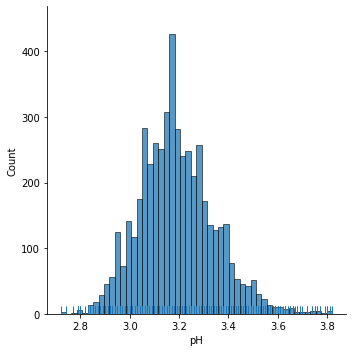

In [64]:
sns.displot(dataset["pH"],kde=False,rug=True)

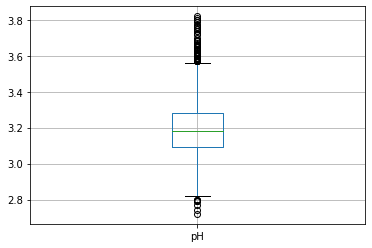

In [65]:
dataset.boxplot(column=["pH"])

In [66]:
dataset.loc[dataset['pH'] < 2.8,'pH']=2.8

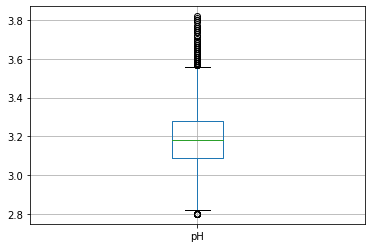

In [67]:
dataset.boxplot(column=["pH"])

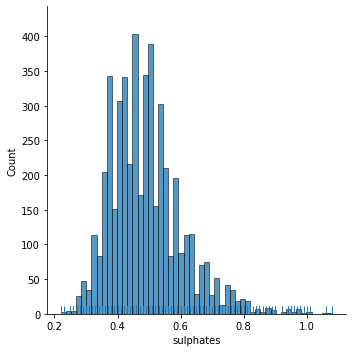

In [68]:
sns.displot(dataset["sulphates"],kde=False,rug=True)

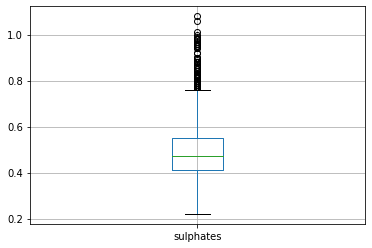

In [69]:
dataset.boxplot(column=["sulphates"])

In [70]:
dataset.loc[dataset['sulphates'] > 1,'sulphates']=1

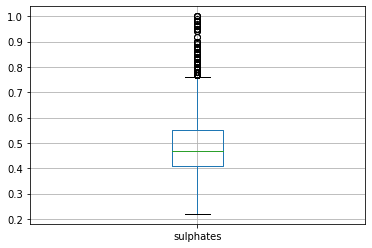

In [71]:
dataset.boxplot(column=["sulphates"])

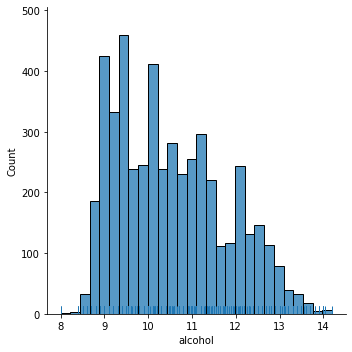

In [72]:
sns.displot(dataset["alcohol"],kde=False,rug=True)

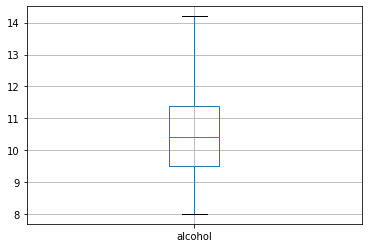

In [73]:
dataset.boxplot(column=["alcohol"])

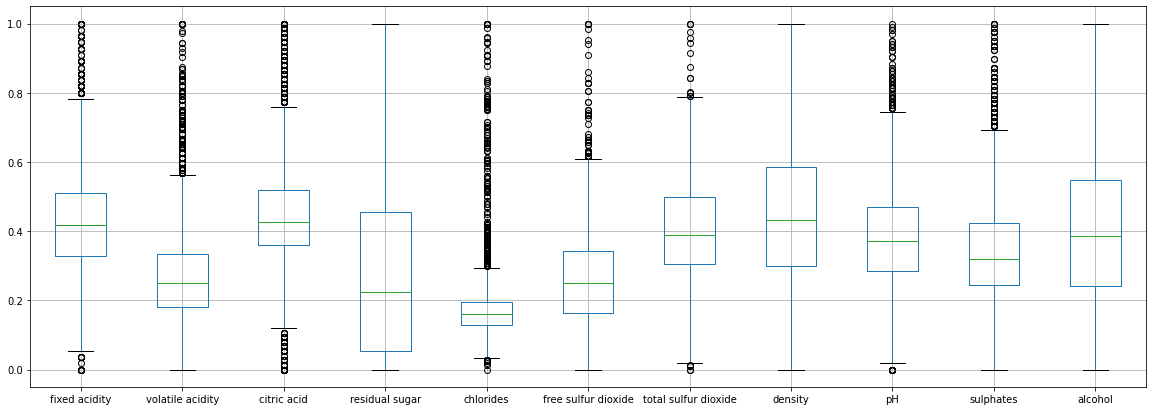

In [74]:
standardized_ds = pd.DataFrame (minmax_scale (dataset.drop (columns="quality"), axis=0, copy=True),columns=dataset.drop (columns="quality").columns) 
standardized_ds.boxplot(figsize=(20,7))

Let's see the **correlation matrix** and **descriptive statistics** on the dataset:

In [75]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.025947,0.295449,0.089443,0.023874,-0.048303,0.091672,0.270610,-0.427152,-0.018590,-0.121566,-0.113093
volatile acidity,-0.025947,1.000000,-0.158325,0.052522,0.065871,-0.098734,0.089333,0.008482,-0.033048,-0.036767,0.067753,-0.193834
citric acid,0.295449,-0.158325,1.000000,0.093756,0.118614,0.098521,0.122959,0.153653,-0.167566,0.066402,-0.081920,-0.008669
residual sugar,0.089443,0.052522,0.093756,1.000000,0.089429,0.316174,0.409439,0.832960,-0.199547,-0.029132,-0.459703,-0.099631
chlorides,0.023874,0.065871,0.118614,0.089429,1.000000,0.105794,0.202571,0.267628,-0.092073,0.014746,-0.371390,-0.213545
free sulfur dioxide,-0.048303,-0.098734,0.098521,0.316174,0.105794,1.000000,0.613698,0.314066,-0.004344,0.058260,-0.255618,0.015571
total sulfur dioxide,0.091672,0.089333,0.122959,0.409439,0.202571,0.613698,1.000000,0.544759,0.001533,0.134080,-0.451026,-0.172976
density,0.270610,0.008482,0.153653,0.832960,0.267628,0.314066,0.544759,1.000000,-0.099240,0.073459,-0.802902,-0.316225
pH,-0.427152,-0.033048,-0.167566,-0.199547,-0.092073,-0.004344,0.001533,-0.099240,1.000000,0.156157,0.121428,0.099493
sulphates,-0.018590,-0.036767,0.066402,-0.029132,0.014746,0.058260,0.134080,0.073459,0.156157,1.000000,-0.017732,0.053548


The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [76]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.853563,0.278021,0.333387,6.374633,0.045685,35.270314,138.324010,0.994017,3.188307,0.489816,10.514267,5.877909
std,0.833509,0.099439,0.116886,4.976615,0.020985,16.638918,42.283398,0.002910,0.150888,0.113980,1.230621,0.885639
min,4.500000,0.080000,0.000000,0.600000,0.009000,2.000000,15.000000,0.987110,2.800000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,10.000000,0.800000,0.750000,21.000000,0.220000,130.000000,320.000000,1.002500,3.820000,1.000000,14.200000,9.000000


**Third Step:** check how many instances per label there are and group them if necessary.





In [77]:
dataset["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Note that there are no instances graded as 10 and from 0 to 2. Moreover, most of the grades are 5, 6, and 7. There are not instances enough for the rest of the classes to perform a classification task using neural networks. Grades 3, 4, and 5 are grouped as **poor** (quality),  grade 6 corresponds to **regular** quality, and grades 7,8, and 9 are grouped under **excellent** quality.  

In [78]:
dataset.loc[dataset['quality'] < 5,'quality']=5
dataset.loc[dataset['quality'] > 7,'quality']=7

In [79]:
dataset["quality"].value_counts()

6    2198
5    1640
7    1060
Name: quality, dtype: int64

In [80]:
dataset.shape

(4898, 12)

**Fourth Step:** suffle the dataset (three times):

In [81]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.22,0.29,8.9,0.046,82.0,188.0,0.99550,3.30,0.44,10.3,6
1,7.1,0.43,0.30,6.6,0.025,15.0,138.0,0.99126,3.18,0.46,12.6,6
2,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0,5
3,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
4,7.2,0.23,0.46,6.4,0.036,17.0,85.0,0.99279,3.10,0.78,11.7,6


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ (target) for supervised learning. There are 11 *attributes*, and one *label* (quality) with three different values or *classes*.

In [82]:
t = dataset.quality
t[:10]

0    6
1    6
2    5
3    6
4    6
5    6
6    5
7    7
8    5
9    7
Name: quality, dtype: int64

In [83]:
x = dataset.drop (columns="quality")

In [84]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.22,0.29,8.9,0.046,82.0,188.0,0.99550,3.30,0.44,10.3
1,7.1,0.43,0.30,6.6,0.025,15.0,138.0,0.99126,3.18,0.46,12.6
2,6.9,0.30,0.21,15.7,0.056,49.0,159.0,0.99827,3.11,0.48,9.0
3,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
4,7.2,0.23,0.46,6.4,0.036,17.0,85.0,0.99279,3.10,0.78,11.7


**Sixth Step**: one-hot encode the classes for a classification problem.

In [85]:
names = np.array(["Poor","Regular","Excellent"])
names

array(['Poor', 'Regular', 'Excellent'], dtype='<U9')

In [86]:
encoder = OneHotEncoder(categories="auto", sparse=False) # Function that one-hot encodes integers
one_hot_t = encoder.fit_transform (t.values.reshape(-1,1))
one_hot_t[:10]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [87]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=names)
one_hot_t[:10]

,Poor,Regular,Excellent
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


**Seventh Step:** min-max scale of the input dataset (attributes) within the range [-1,1] for each feature independently.

In [88]:
x_s = pd.DataFrame (minmax_scale (x, feature_range=(-1, 1),axis=0, copy=True),columns=x.columns) 

In [89]:
x_s[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.163636,-0.611111,-0.226667,-0.186275,-0.649289,0.250000,0.134426,0.090318,-0.019608,-0.435897,-0.258065
1,-0.054545,-0.027778,-0.200000,-0.411765,-0.848341,-0.796875,-0.193443,-0.460689,-0.254902,-0.384615,0.483871
2,-0.127273,-0.388889,-0.440000,0.480392,-0.554502,-0.265625,-0.055738,0.450292,-0.392157,-0.333333,-0.677419
3,-0.345455,-0.472222,-0.226667,0.137255,-0.668246,-0.109375,0.186885,0.391813,-0.333333,-0.538462,-0.741935
4,-0.018182,-0.583333,0.226667,-0.431373,-0.744076,-0.765625,-0.540984,-0.261858,-0.411765,0.435897,0.193548
5,-0.563636,-0.472222,-0.573333,-0.176471,-0.582938,-0.531250,-0.370492,-0.008447,0.098039,-0.615385,-0.225806
6,-0.200000,-0.472222,-0.173333,0.480392,-0.744076,-0.343750,0.075410,0.402209,-0.098039,-0.128205,-0.483871
7,-0.236364,-0.527778,0.040000,-0.916667,-0.706161,-0.406250,-0.514754,-0.481481,0.078431,-0.538462,0.096774
8,-0.418182,-0.444444,-0.066667,0.196078,-0.630332,-0.046875,0.403279,0.350227,-0.450980,-0.538462,-0.709677
9,0.272727,-0.277778,0.306667,-0.176471,-0.772512,-0.421875,0.081967,-0.156595,-0.352941,-0.589744,0.387097


In [90]:
x_s.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,-0.144159,-0.449943,-0.110968,-0.433860,-0.652271,-0.480151,-0.191318,-0.102461,-0.238613,-0.308163,-0.188946
std,0.303094,0.276219,0.311697,0.487903,0.198911,0.259983,0.277268,0.378107,0.295859,0.292256,0.396974
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.345455,-0.638889,-0.280000,-0.892157,-0.744076,-0.671875,-0.390164,-0.400585,-0.431373,-0.512821,-0.516129
50%,-0.163636,-0.500000,-0.146667,-0.549020,-0.677725,-0.500000,-0.219672,-0.138402,-0.254902,-0.358974,-0.225806
75%,0.018182,-0.333333,0.040000,-0.088235,-0.611374,-0.312500,-0.003279,0.168291,-0.058824,-0.153846,0.096774
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finally, both matrix $x$ and target values $t$ are **saved to csv files**.

In [91]:
x_s.to_csv(ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)